In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
df = pd.read_csv("dataset/healthcare_dataset.csv")

In [7]:
unique_years = pd.to_datetime(df['Discharge Date']).dt.year.unique()

In [8]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [9]:
"""Rename the column names"""
column_mapping = {
       'Name': 'patient_name',
       'Age': 'patient_age',
       'Gender': 'patient_gender',
       'Blood Type': 'blood_type',
       'Medical Condition': 'medical_condition',
       'Date of Admission': 'admission_date',
       'Doctor': 'doctor_name',
       'Hospital': 'hospital_name',
       'Insurance Provider': 'insurance_provider',
       'Billing Amount': 'billing_amount',
       'Room Number': 'room_number',
       'Admission Type': 'admission_type',
       'Discharge Date': 'discharge_date',
       'Medication': 'medication',
       'Test Results': 'test_results'
}
df = df.rename(columns=column_mapping)

In [10]:
df

,patient_name,patient_age,patient_gender,blood_type,medical_condition,admission_date,doctor_name,hospital_name,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [11]:
# Fix Patient names.
df['patient_name'] = df['patient_name'].apply(lambda x: ' '.join(word.capitalize() for word in str(x).lower().split()))

In [12]:
df.dtypes

patient_name           object
patient_age             int64
patient_gender         object
blood_type             object
medical_condition      object
admission_date         object
doctor_name            object
hospital_name          object
insurance_provider     object
billing_amount        float64
room_number             int64
admission_type         object
discharge_date         object
medication             object
test_results           object
dtype: object

In [13]:
# Remap genders
gender_map = {'male': 'M', 'female': 'F', 'm': 'M', 'f': 'F'}
df['patient_gender'] = df['patient_gender'].str.strip().str.lower().map(gender_map)
df["patient_gender"].unique()

array(['M', 'F'], dtype=object)

In [14]:
df['admission_date'] = pd.to_datetime(df['admission_date'])  # Convert admission_date to date type
df.dtypes

patient_name                  object
patient_age                    int64
patient_gender                object
blood_type                    object
medical_condition             object
admission_date        datetime64[ns]
doctor_name                   object
hospital_name                 object
insurance_provider            object
billing_amount               float64
room_number                    int64
admission_type                object
discharge_date                object
medication                    object
test_results                  object
dtype: object

In [15]:
df['discharge_date'] = pd.to_datetime(df['discharge_date']) # Convert discharge_date to date type.

In [16]:
"""
Remove symbols from hospital names.
"""
df['hospital_name'] = df['hospital_name'].apply(
    lambda name: ' '.join(
        word.capitalize() for word in str(name)\
        .replace(
            '"',' '
        ).replace(
            ',', ' '
        ).strip().split()
    )
)

In [17]:
df.drop(columns="room_number", inplace=True)

In [18]:
"""Add lenght_of_stay column. -- in days."""
df['length_of_stay'] = (df['discharge_date'] - df['admission_date']).dt.days

In [19]:
df

,patient_name,patient_age,patient_gender,blood_type,medical_condition,admission_date,doctor_name,hospital_name,insurance_provider,billing_amount,admission_type,discharge_date,medication,test_results,length_of_stay
0,Bobby Jackson,30,M,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.281306,Urgent,2024-02-02,Paracetamol,Normal,2
1,Leslie Terry,62,M,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,Danny Smith,76,F,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.096079,Emergency,2022-10-07,Aspirin,Normal,15
3,Andrew Watts,28,F,O+,Diabetes,2020-11-18,Kevin Wells,Hernandez Rogers And Vang,Medicare,37909.782410,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,Adrienne Bell,43,F,AB+,Cancer,2022-09-19,Kathleen Hanna,White-white,Aetna,14238.317814,Urgent,2022-10-09,Penicillin,Abnormal,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,Elizabeth Jackson,42,F,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-thompson,Blue Cross,2650.714952,Elective,2020-09-15,Penicillin,Abnormal,30
55496,Kyle Perez,61,F,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-moyer,Cigna,31457.797307,Elective,2020-02-01,Aspirin,Normal,9
55497,Heather Wang,38,F,B+,Hypertension,2020-07-13,Joe Jacobs DVM,And Mahoney Johnson Vasquez,UnitedHealthcare,27620.764717,Urgent,2020-08-10,Ibuprofen,Abnormal,28
55498,Jennifer Jones,43,M,O-,Arthritis,2019-05-25,Kimberly Curry,Jackson Todd And Castro,Medicare,32451.092358,Elective,2019-05-31,Ibuprofen,Abnormal,6


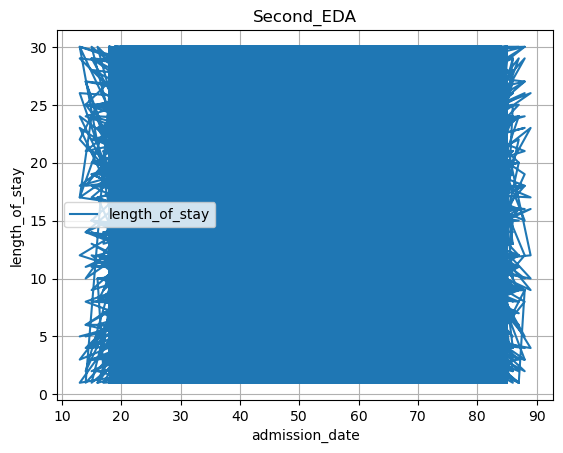

In [20]:
#df['patient_age'] = pd.to_numeric(df['patient_age'], errors='coerce')
#df['medical_condition'] = pd.to_numeric(df['medical_condition'], errors='coerce')

df.plot(x='patient_age', y='length_of_stay', kind='line')
plt.title('Second_EDA')
plt.xlabel('admission_date')
plt.ylabel('length_of_stay')
plt.grid(True)
plt.show()

In [21]:
features = df[["medical_condition", "patient_age", "admission_type", "billing_amount", "medication", "length_of_stay", "blood_type"]]
print(features.describe())

        patient_age  billing_amount  length_of_stay
count  55500.000000    55500.000000    55500.000000
mean      51.539459    25539.316097       15.509009
std       19.602454    14211.454431        8.659600
min       13.000000    -2008.492140        1.000000
25%       35.000000    13241.224652        8.000000
50%       52.000000    25538.069376       15.000000
75%       68.000000    37820.508436       23.000000
max       89.000000    52764.276736       30.000000


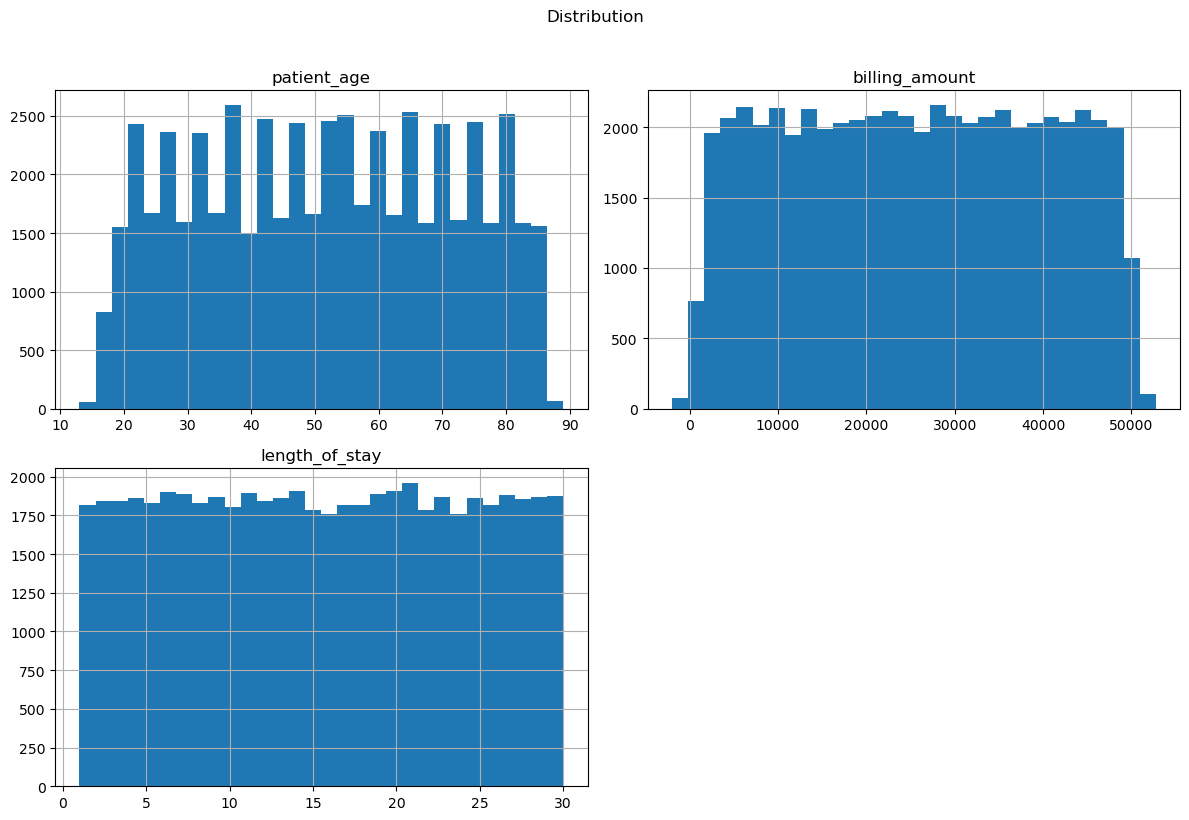

In [22]:
numeric_features = features.select_dtypes(include=['int64', 'float64'])

numeric_features.hist(figsize=(12, 8), bins=30)
plt.suptitle('Distribution', y=1.02)
plt.tight_layout()
plt.show()


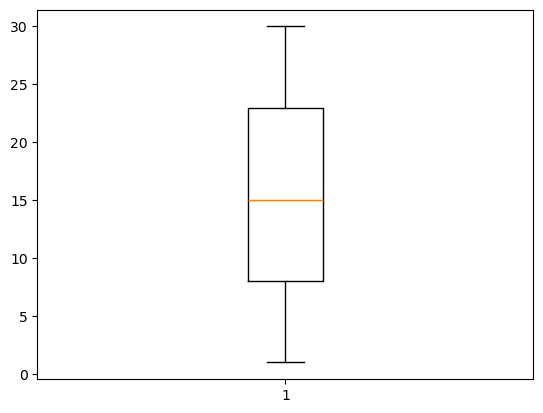

In [23]:
plt.boxplot(x=df['length_of_stay'])
plt.show()

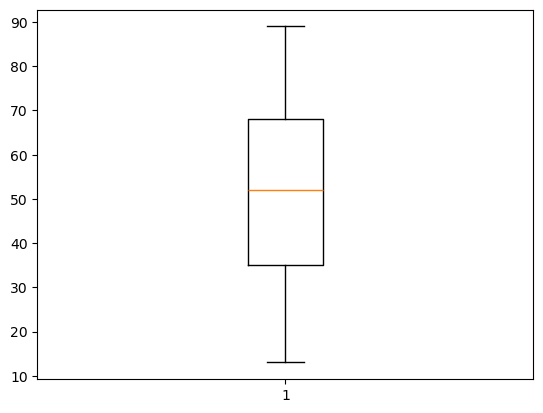

In [24]:
plt.boxplot(x=df['patient_age'])
plt.show()

<Axes: >

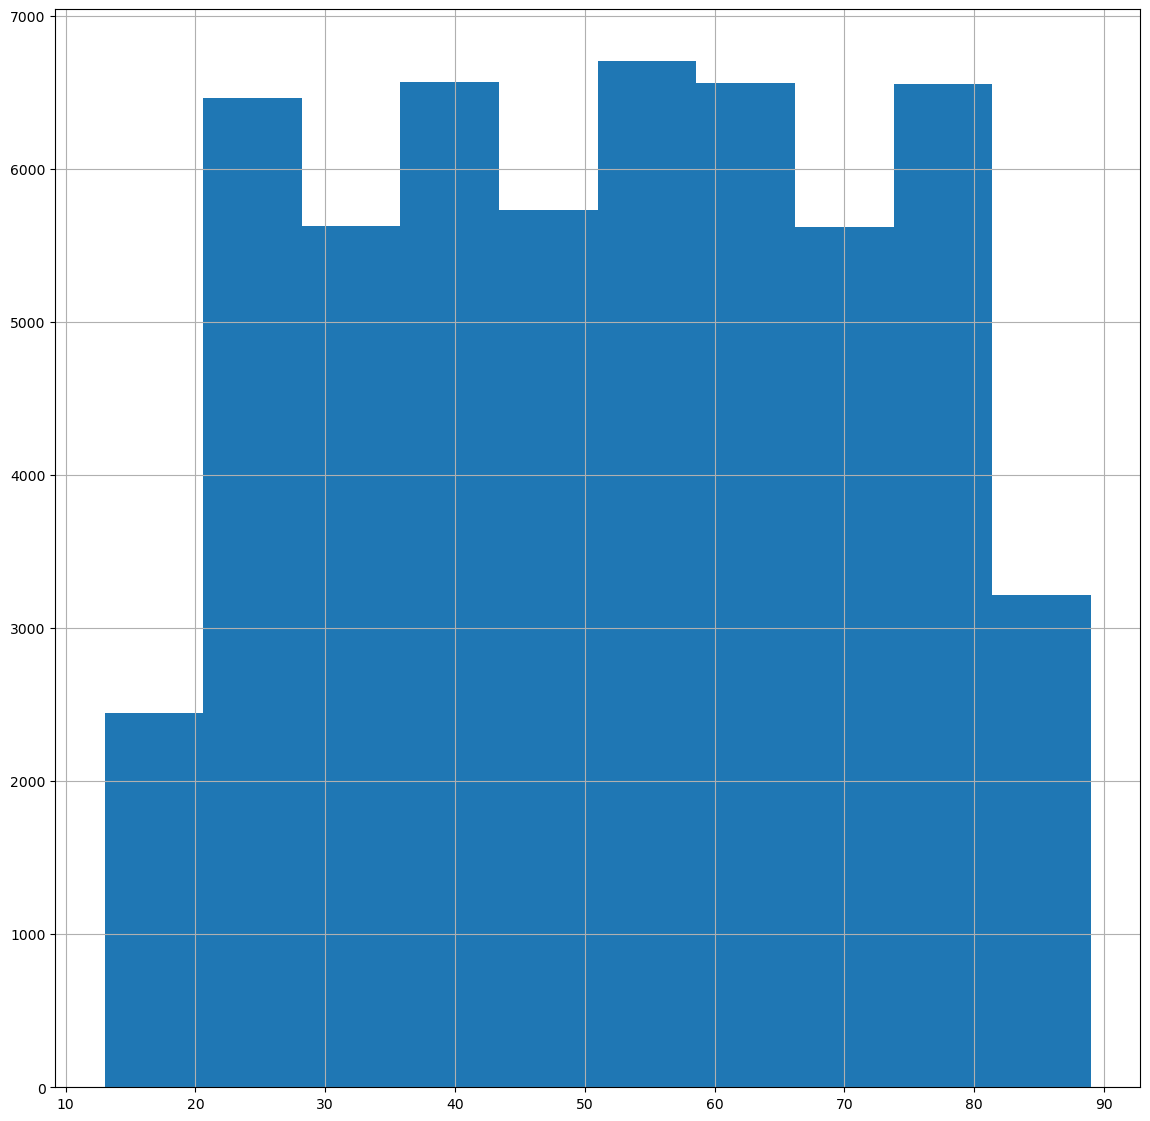

In [25]:
df["patient_age"].hist(figsize=(14, 14))

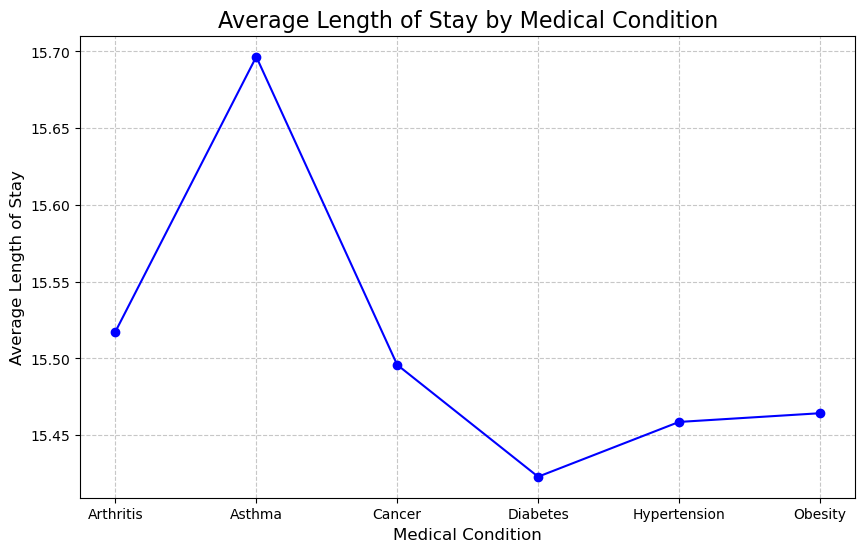

In [36]:
"""

"""

# Calculate the average length of stay for each medical condition
average_stay = df.groupby("medical_condition")["length_of_stay"].mean().reset_index()

# Sort the values for a cleaner plot
average_stay = average_stay.sort_values(by="medical_condition")

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(average_stay["medical_condition"], average_stay["length_of_stay"], marker='o', linestyle='-', color='b')
plt.title("Average Length of Stay by Medical Condition", fontsize=16)
plt.xlabel("Medical Condition", fontsize=12)
plt.ylabel("Average Length of Stay", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()